## Image scaler

In this notebook, I demonstrate how to:
1) Compute the FFT and shift the lowest frequencies to the origin axis of the domain
2) Downscale the images using:
    a) subsampling in the space domain
    b) select a window with the lowest frequencies in the FFT domain
3) Upsace the images using
    a) zero padding in the FFT domain
    b) interpolation in the space domain

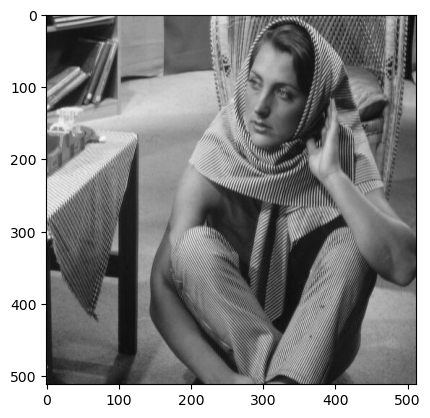

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#read image content
img = plt.imread('barbara.jpg')
#reshape image to grayscale
img = img[:,:,0]
plt.imshow(img, cmap='gray')


##### Step 1: Compute FFT and shift FFT

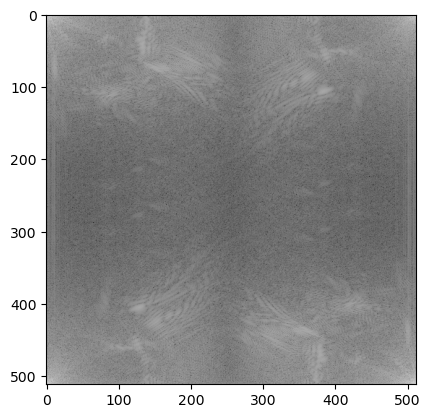

In [4]:
#perform fourier transform
img_fft = np.fft.fft2(img)
plt.imshow(np.log(np.abs(img_fft)), cmap='gray')


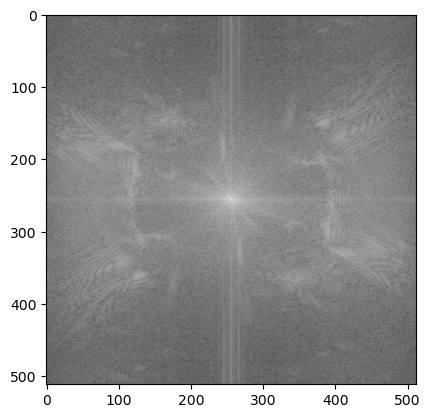

In [5]:
#shift the zero-frequency component to the center of the spectrum
img_fft_shift = np.fft.fftshift(img_fft)
plt.imshow(np.log(np.abs(img_fft_shift)), cmap='gray')

##### Step 2a: Downsample image using subsampling in the space domain

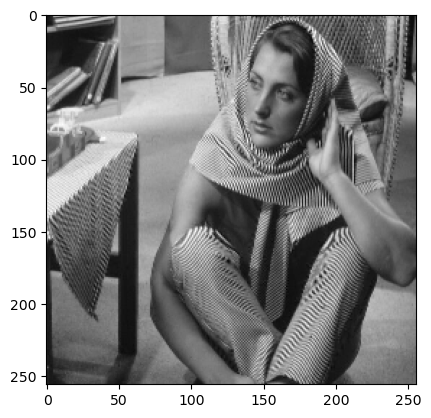

In [6]:
#subsample to get smaller image of half size
#select every 2nd pixel in x and y direction
img_subsampled = img[::2,::2]
plt.imshow(img_subsampled, cmap='gray')

##### Step 2b: Downsample image by selecting a smaller window in the FFT domain

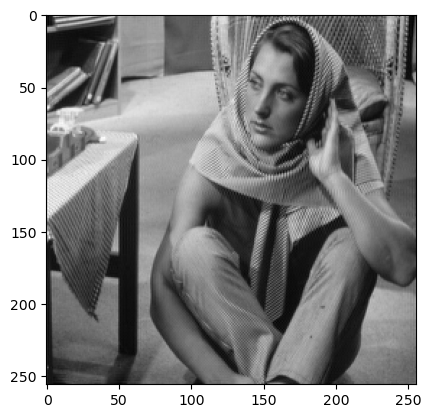

In [7]:
# extract the center window of the shifted fft domain
img_fft_shift_window = img_fft_shift[128:384, 128:384]
# perform inverse fourier transform
img_ifft_subsampled = np.fft.ifft2(img_fft_shift_window)
lt.imshow(np.abs(img_ifft_subsampled), cmap='gray')

### Comparison (downsizing)

It can be noticed that for smooth textures in the image (e.g. carpet, table legs) there is no visible difference between the two methods of downsampling.

However, for textures with a lot of contrast (table cloth, striped pants), the stripes disappear with the downsampling in the FFT domain, whereas they are still visible when using the subsample downsizing method.

The difference between these two methods seems to appear in naturalness; while subsampling keeps the information about the stripes, they seem less natural than the downsampling in the FFT domain.

##### Step 3a: Upsample image by zero-padding in the FFT domain

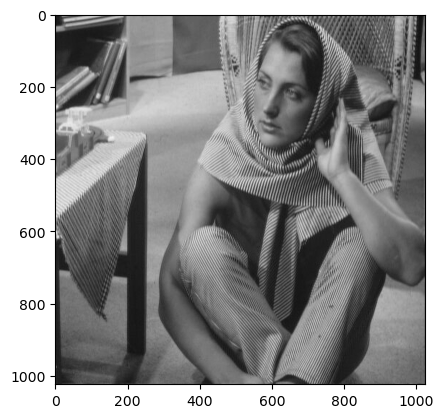

In [13]:
#zero padding the fourier transform of the image
img_fft_shift_pad = np.zeros((1024,1024), dtype=np.complex64)
img_fft_shift_pad[0:512, 0:512] = img_fft_shift
#shift invert and plt imshow the image
img_fft_pad_inv = np.fft.ifft2(img_fft_shift_pad)

plt.imshow(np.abs(img_fft_pad_inv), cmap='gray')

##### Step 3b: Upsample image by linear interpolation in the space domain

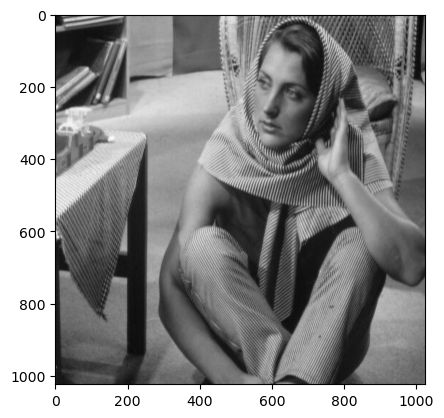

In [8]:
#upscale the image by 2x using linear interpolation
from scipy import ndimage
img_up = ndimage.zoom(img, 2, order=1)

plt.imshow(img_up, cmap='gray')

### Comparison (upsizing)

It seems like both methods work very similarly to the human eye.